In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/4th yr/Data

/content/drive/MyDrive/4th yr/Data


In [ ]:
df = pd.read_csv("house_price.csv")
df.head()

,soldPrice,sqftLiving,sqftLand,sqftAbove,sqftBasement,numBedRooms,numBathRooms,numFloors,builtYear,grade,waterFront,condition
0,221900.0,1180,5650,1180,0,3,1,1,1955,2,0,average
1,180000.0,770,10000,770,0,2,1,1,1933,1,0,average
2,604000.0,1960,5000,1050,910,4,3,1,1965,2,0,excellent
3,510000.0,1680,8080,1680,0,3,2,1,1987,2,0,average
4,229500.0,1780,7470,1050,730,3,1,1,1960,2,0,average


In [ ]:
df.isnull().sum()

soldPrice       0
sqftLiving      0
sqftLand        0
sqftAbove       0
sqftBasement    0
numBedRooms     0
numBathRooms    0
numFloors       0
builtYear       0
grade           0
waterFront      0
condition       0
dtype: int64

In [ ]:
df.duplicated().sum()

1

In [ ]:
df[df.duplicated(keep = False)]

,soldPrice,sqftLiving,sqftLand,sqftAbove,sqftBasement,numBedRooms,numBathRooms,numFloors,builtYear,grade,waterFront,condition
150,259950.0,1070,649,720,350,2,2,2,2008,2,0,average
1209,259950.0,1070,649,720,350,2,2,2,2008,2,0,average


In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5574, 12)

In [ ]:
df.columns

Index(['soldPrice', 'sqftLiving', 'sqftLand', 'sqftAbove', 'sqftBasement',
       'numBedRooms', 'numBathRooms', 'numFloors', 'builtYear', 'grade',
       'waterFront', 'condition'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5574 entries, 0 to 5574
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   soldPrice     5574 non-null   float64
 1   sqftLiving    5574 non-null   int64  
 2   sqftLand      5574 non-null   int64  
 3   sqftAbove     5574 non-null   int64  
 4   sqftBasement  5574 non-null   int64  
 5   numBedRooms   5574 non-null   int64  
 6   numBathRooms  5574 non-null   int64  
 7   numFloors     5574 non-null   int64  
 8   builtYear     5574 non-null   int64  
 9   grade         5574 non-null   int64  
 10  waterFront    5574 non-null   int64  
 11  condition     5574 non-null   object 
dtypes: float64(1), int64(10), object(1)
memory usage: 566.1+ KB


In [ ]:
df.grade.unique()

array([2, 1, 3, 4])

In [ ]:
df.waterFront.unique()

array([0, 1])

In [ ]:
df.condition.unique()

array(['average', 'excellent', 'good'], dtype=object)

In [ ]:
df.builtYear.unique()

array([1955, 1933, 1965, 1987, 1960, 1942, 1979, 1994, 1921, 1969, 1904,
       1922, 1959, 1966, 1991, 1968, 1972, 1986, 1941, 1956, 1948, 1952,
       1962, 1954, 1945, 1950, 1953, 1981, 1925, 1923, 1905, 1947, 1990,
       1967, 1975, 1964, 1901, 1949, 1961, 1943, 1915, 1957, 2005, 1983,
       1976, 1940, 1918, 1978, 1930, 1937, 1939, 1931, 1988, 1929, 1993,
       2002, 1916, 2003, 1924, 1907, 1928, 2004, 1997, 2001, 1998, 2006,
       1909, 1971, 2000, 1980, 1985, 1973, 1917, 1946, 1958, 1951, 1900,
       2008, 1963, 1984, 1944, 1982, 1910, 1927, 1911, 1934, 1974, 1995,
       1999, 1992, 1908, 1932, 1914, 1977, 1926, 1906, 1938, 2009, 1970,
       1936, 1919, 2014, 1989, 1920, 1912, 2015, 2007, 1996, 1903, 2011,
       1913, 2012, 2013, 1902, 1935, 2010])

In [ ]:
df  = df.drop(['builtYear'],axis = 'columns')

In [ ]:
df.shape

(5574, 11)

In [ ]:
df.numBedRooms.unique()

array([3, 2, 4, 5, 1])

In [ ]:
df.numBathRooms.unique()

array([1, 3, 2, 4, 5, 6])

In [ ]:
df.numFloors.unique()

array([1, 2, 3])

# Calculate Price per Square feet

In [ ]:
df['price_per_sqft'] = df['soldPrice']/(df['sqftLiving']+df['sqftLand']+df['sqftAbove']+df['sqftBasement'])

In [ ]:
df.head()

,soldPrice,sqftLiving,sqftLand,sqftAbove,sqftBasement,numBedRooms,numBathRooms,numFloors,grade,waterFront,condition,price_per_sqft
0,221900.0,1180,5650,1180,0,3,1,1,2,0,average,27.702871
1,180000.0,770,10000,770,0,2,1,1,1,0,average,15.597920
2,604000.0,1960,5000,1050,910,4,3,1,2,0,excellent,67.713004
3,510000.0,1680,8080,1680,0,3,2,1,2,0,average,44.580420
4,229500.0,1780,7470,1050,730,3,1,1,2,0,average,20.806890


In [ ]:
df['price_per_sqft'].describe()

count    5574.000000
mean       41.898216
std        28.545486
min         0.162920
25%        21.911850
50%        33.200555
75%        55.964864
max       198.771232
Name: price_per_sqft, dtype: float64

Text(0, 0.5, 'Count')

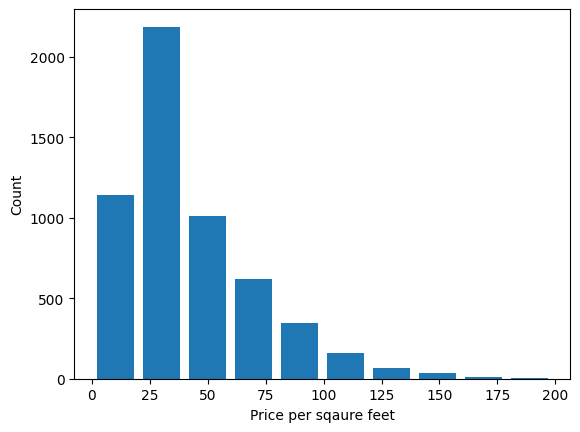

In [ ]:
plt.hist(df.price_per_sqft,rwidth = 0.8)
plt.xlabel("Price per sqaure feet")
plt.ylabel("Count")

In [ ]:
df.drop(['price_per_sqft'],axis = 'columns',inplace = True)
df.head()

KeyError: "['price_per_sqft'] not found in axis"

In [ ]:
df_numerical = df.drop(columns = ['grade','waterFront','condition'],axis = 'column')

In [ ]:
df_numerical.head()

,soldPrice,sqftLiving,sqftLand,sqftAbove,sqftBasement,numBedRooms,numBathRooms,numFloors
0,221900.0,1180,5650,1180,0,3,1,1
1,180000.0,770,10000,770,0,2,1,1
2,604000.0,1960,5000,1050,910,4,3,1
3,510000.0,1680,8080,1680,0,3,2,1
4,229500.0,1780,7470,1050,730,3,1,1


In [ ]:
correlation_plot = df_numerical.corr()

In [ ]:
correlation_plot

,soldPrice,sqftLiving,sqftLand,sqftAbove,sqftBasement,numBedRooms,numBathRooms,numFloors
soldPrice,1.000000,0.702962,0.075572,0.640781,0.368000,0.332127,0.562141,0.361348
sqftLiving,0.702962,1.000000,0.154512,0.884935,0.570430,0.636714,0.798955,0.443836
sqftLand,0.075572,0.154512,1.000000,0.174584,0.021383,0.049183,0.089372,0.039605
sqftAbove,0.640781,0.884935,0.174584,1.000000,0.122281,0.545067,0.724945,0.539550
sqftBasement,0.368000,0.570430,0.021383,0.122281,1.000000,0.395621,0.424141,-0.005695
numBedRooms,0.332127,0.636714,0.049183,0.545067,0.395621,1.000000,0.600834,0.267151
numBathRooms,0.562141,0.798955,0.089372,0.724945,0.424141,0.600834,1.000000,0.535139
numFloors,0.361348,0.443836,0.039605,0.539550,-0.005695,0.267151,0.535139,1.000000


In [ ]:
correlation_plot.style.background_gradient(cmap = 'RdYlGn')

,soldPrice,sqftLiving,sqftLand,sqftAbove,sqftBasement,numBedRooms,numBathRooms,numFloors
soldPrice,1.000000,0.702962,0.075572,0.640781,0.368000,0.332127,0.562141,0.361348
sqftLiving,0.702962,1.000000,0.154512,0.884935,0.570430,0.636714,0.798955,0.443836
sqftLand,0.075572,0.154512,1.000000,0.174584,0.021383,0.049183,0.089372,0.039605
sqftAbove,0.640781,0.884935,0.174584,1.000000,0.122281,0.545067,0.724945,0.539550
sqftBasement,0.368000,0.570430,0.021383,0.122281,1.000000,0.395621,0.424141,-0.005695
numBedRooms,0.332127,0.636714,0.049183,0.545067,0.395621,1.000000,0.600834,0.267151
numBathRooms,0.562141,0.798955,0.089372,0.724945,0.424141,0.600834,1.000000,0.535139
numFloors,0.361348,0.443836,0.039605,0.539550,-0.005695,0.267151,0.535139,1.000000


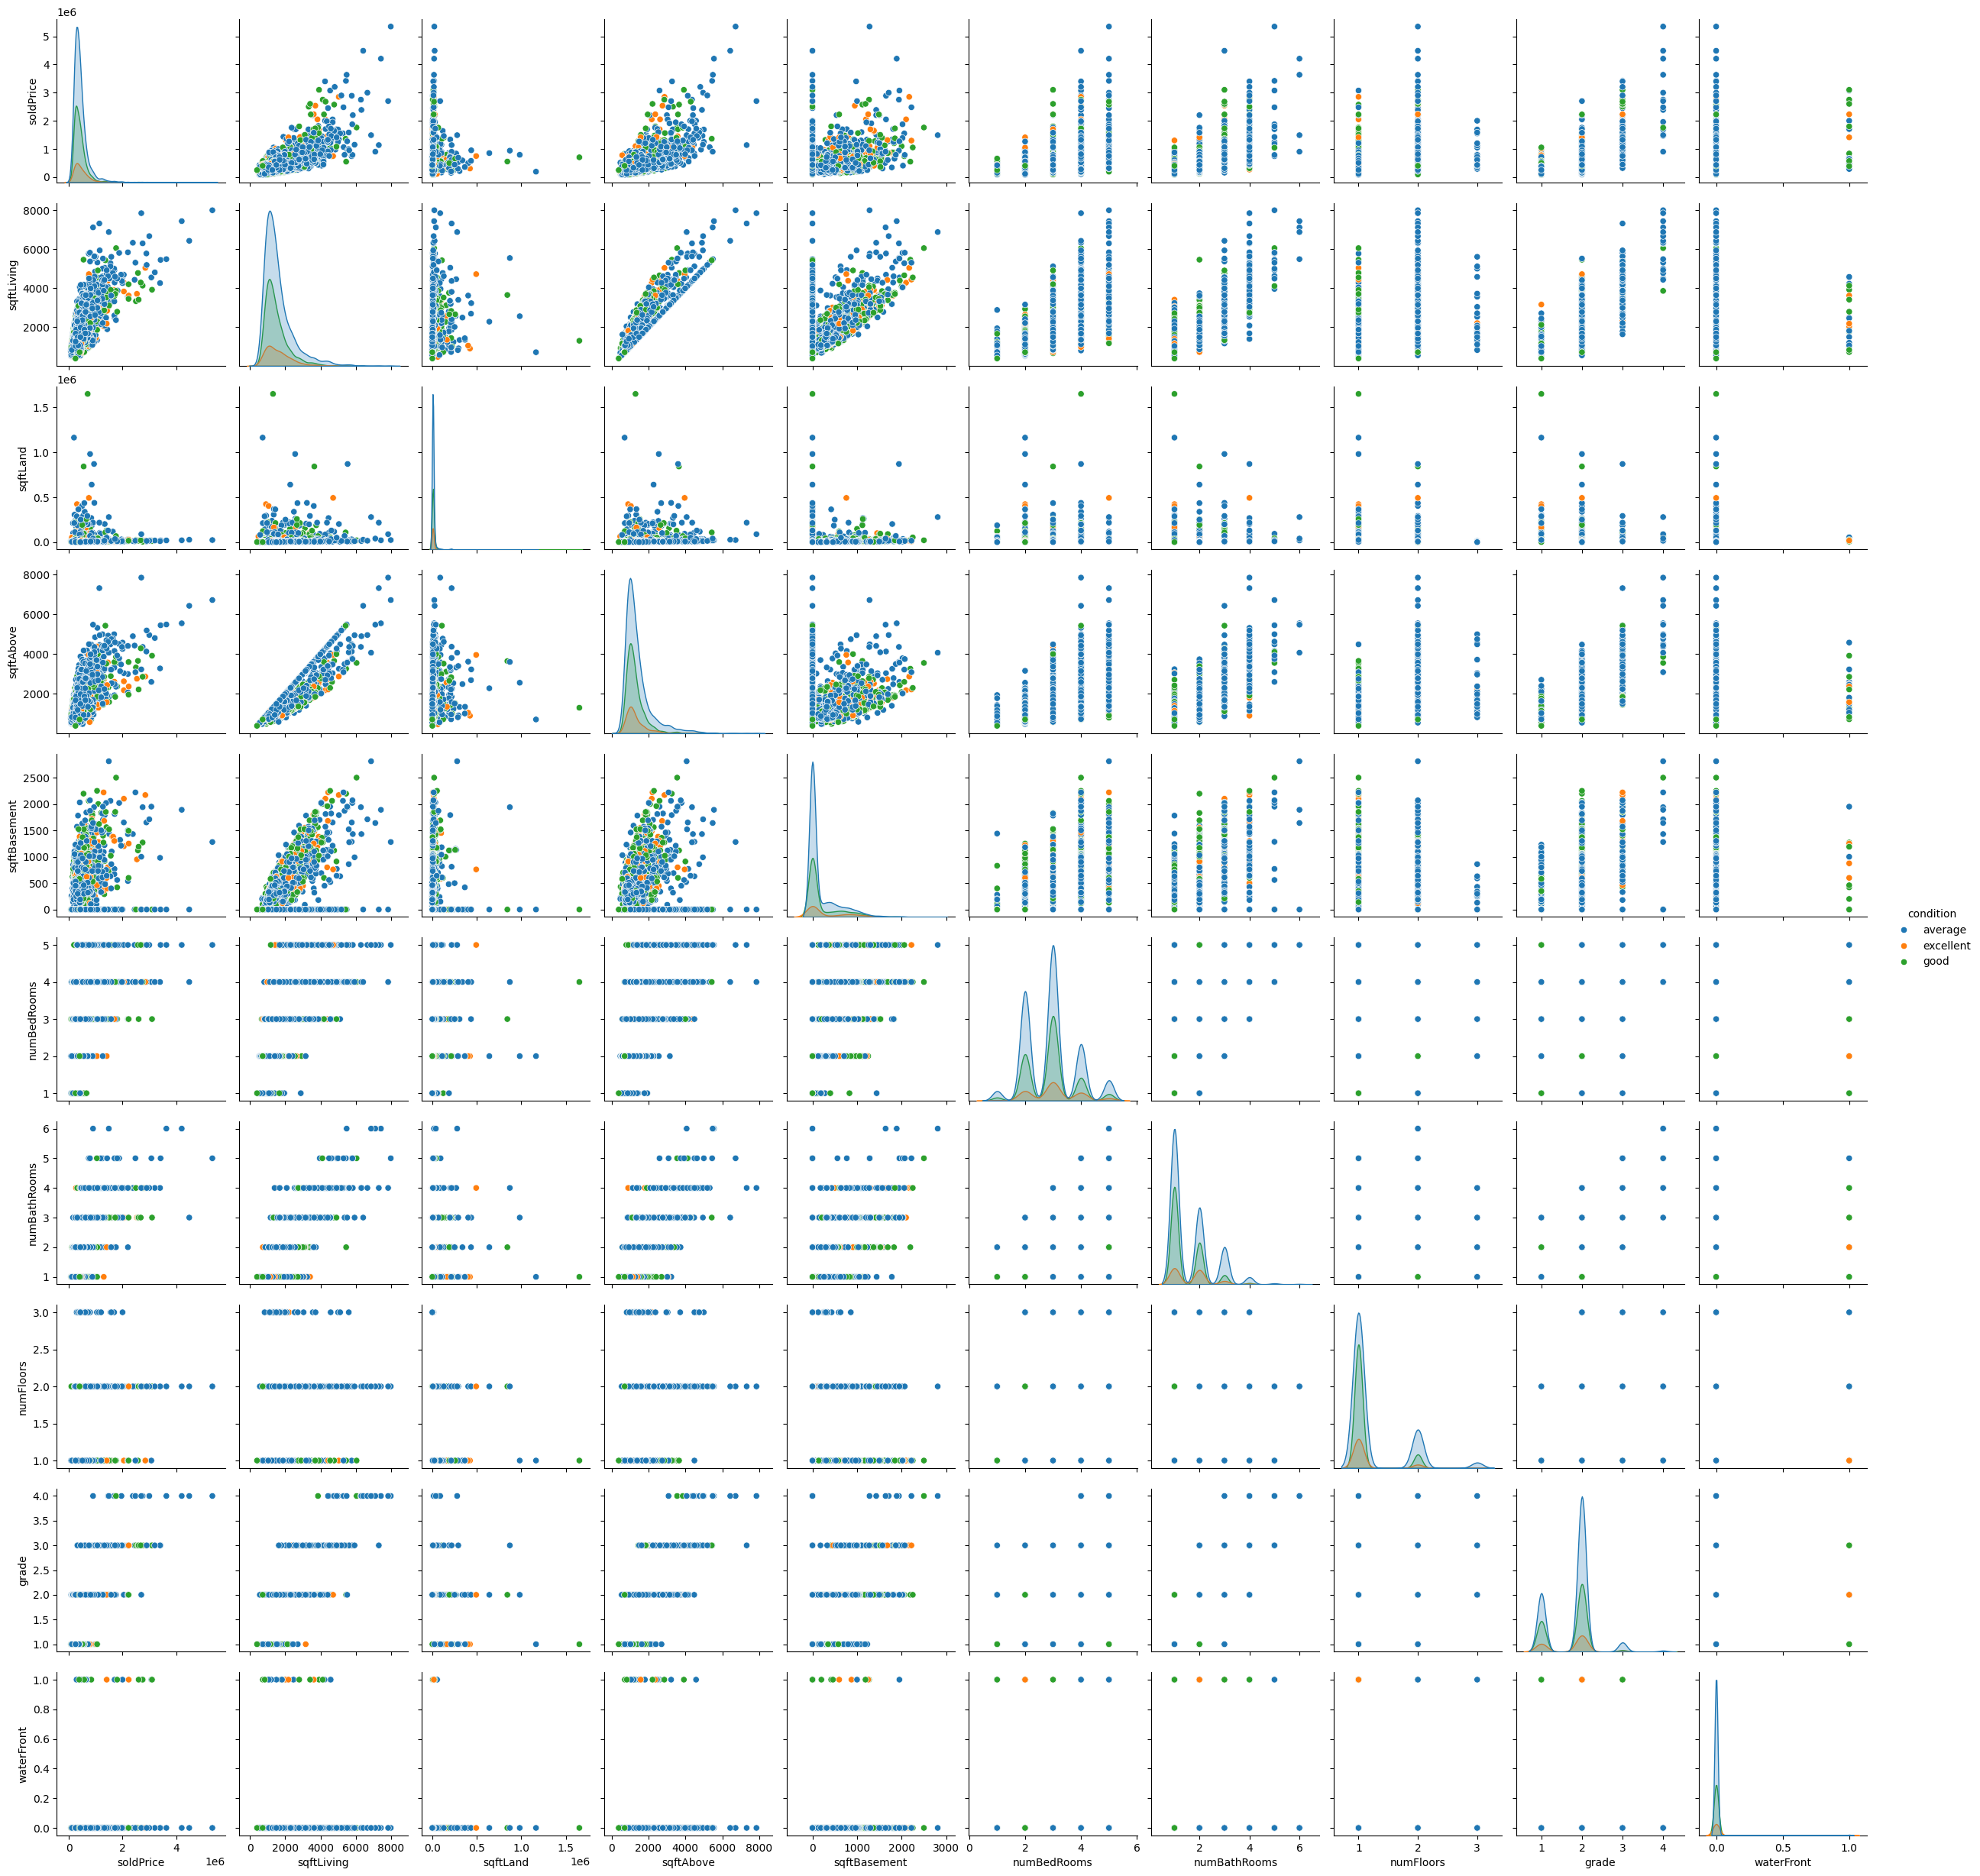

In [ ]:
sns.pairplot(df,hue = 'condition')

<Axes: >

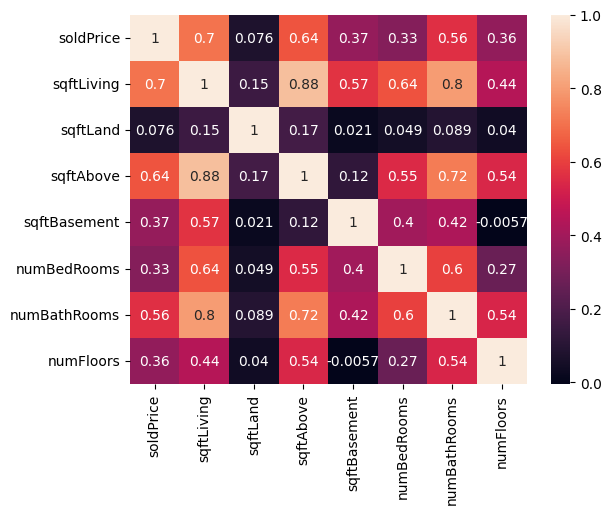

In [ ]:

sns.heatmap(correlation_plot,annot = True)

# One Hot Encoding

In [ ]:
one_hot_encodded_data = pd.get_dummies(df, columns = ['condition'])
print(one_hot_encodded_data)

      soldPrice  sqftLiving  sqftLand  sqftAbove  sqftBasement  numBedRooms  \
0      221900.0        1180      5650       1180             0            3   
1      180000.0         770     10000        770             0            2   
2      604000.0        1960      5000       1050           910            4   
3      510000.0        1680      8080       1680             0            3   
4      229500.0        1780      7470       1050           730            3   
...         ...         ...       ...        ...           ...          ...   
5570   594866.0        2780      6000       2780             0            3   
5571   625000.0        2780      6000       2780             0            3   
5572   399950.0         710      1157        710             0            2   
5573   810000.0        3990      7838       3990             0            4   
5574   429000.0        1490      1126       1490             0            3   

      numBathRooms  numFloors  grade  waterFront  c

In [ ]:
x = one_hot_encodded_data.drop('soldPrice',axis = "columns")

In [ ]:
x.head()

,sqftLiving,sqftLand,sqftAbove,sqftBasement,numBedRooms,numBathRooms,numFloors,grade,waterFront,condition_average,condition_excellent,condition_good
0,1180,5650,1180,0,3,1,1,2,0,True,False,False
1,770,10000,770,0,2,1,1,1,0,True,False,False
2,1960,5000,1050,910,4,3,1,2,0,False,True,False
3,1680,8080,1680,0,3,2,1,2,0,True,False,False
4,1780,7470,1050,730,3,1,1,2,0,True,False,False


In [ ]:
y = df.iloc[:,0]

In [ ]:
y.head()

0    221900.0
1    180000.0
2    604000.0
3    510000.0
4    229500.0
Name: soldPrice, dtype: float64

In [ ]:
one_hot_encodded_data.shape

(5574, 13)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.intercept_

18291.02896031394

In [ ]:
lr.coef_

array([ 1.70394623e+02, -1.88340881e-01,  8.58671270e+01,  8.45274962e+01,
       -6.81504592e+04,  6.78035687e+03,  3.04665826e+04,  9.90287014e+04,
        6.24809212e+05, -2.84047029e+04,  3.00409094e+04, -1.63620655e+03])

In [ ]:
coeff_parameter = pd.DataFrame(lr.coef_,X_train.columns, columns = ['Coefficient'])
coeff_parameter

,Coefficient
sqftLiving,170.394623
sqftLand,-0.188341
sqftAbove,85.867127
sqftBasement,84.527496
numBedRooms,-68150.459194
numBathRooms,6780.356874
numFloors,30466.582581
grade,99028.701393
waterFront,624809.212267
condition_average,-28404.702869


In [ ]:
y_predict = lr.predict(x_test)
y_predict

array([155414.14541169, 235055.90486354, 288349.00029137, ...,
       178611.05493982, 695250.72001583, 325621.12120028])

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.mean_absolute_error(y_test,y_predict))

134347.74676361115
